1. Load your data and cluster labels

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
project_root = Path("..").resolve()
patch_path = project_root / "data/patches/sst_patches_64x64.npy"
labels_path = project_root / "outputs/sst_umap_embeddings.npy"  # Embeddings were used to cluster
patches = np.load(patch_path)

# 🟡 Make sure to reuse labels from DBSCAN
# If you saved them, load with: labels = np.load("outputs/dbscan_labels.npy")
# Or just re-run DBSCAN here on the loaded embeddings
from sklearn.cluster import DBSCAN
embeddings = np.load(project_root / "outputs/sst_umap_embeddings.npy")
labels = DBSCAN(eps=0.5, min_samples=10).fit_predict(embeddings)

2. Visualize random patches from each cluster

🌀 Cluster 0 — 828 patches


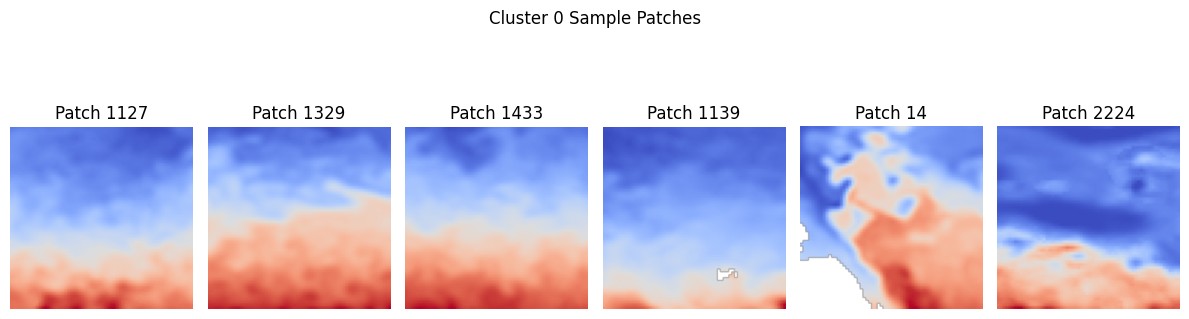

🌀 Cluster 1 — 129 patches


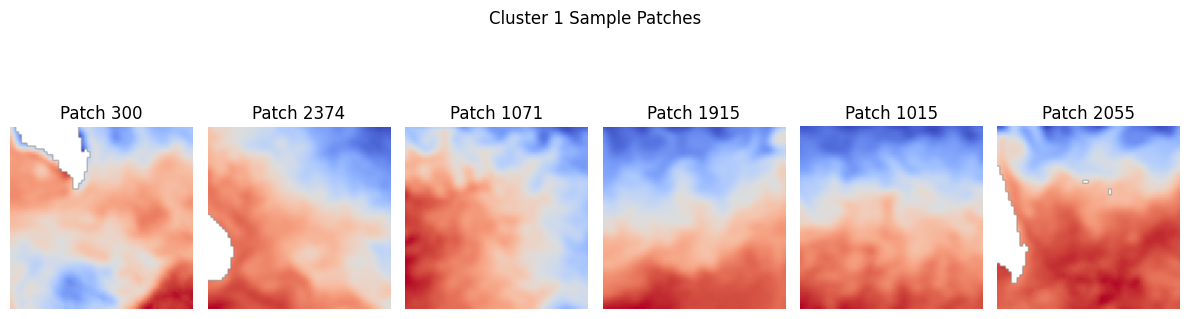

🌀 Cluster 2 — 1191 patches


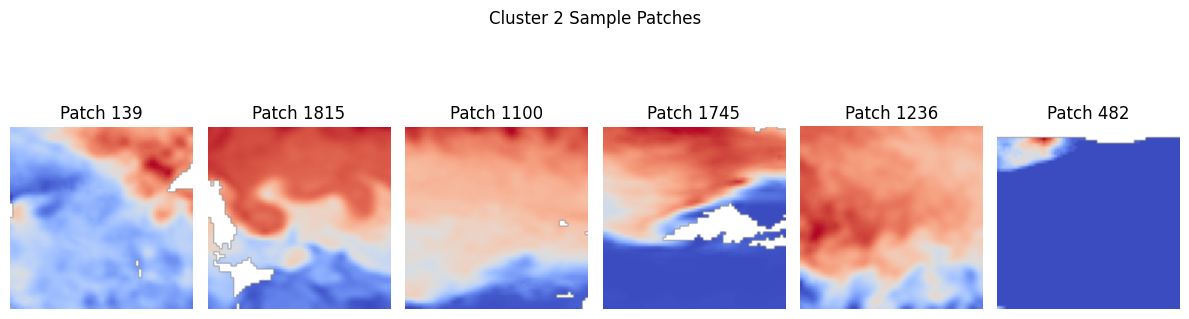

🌀 Cluster 3 — 250 patches


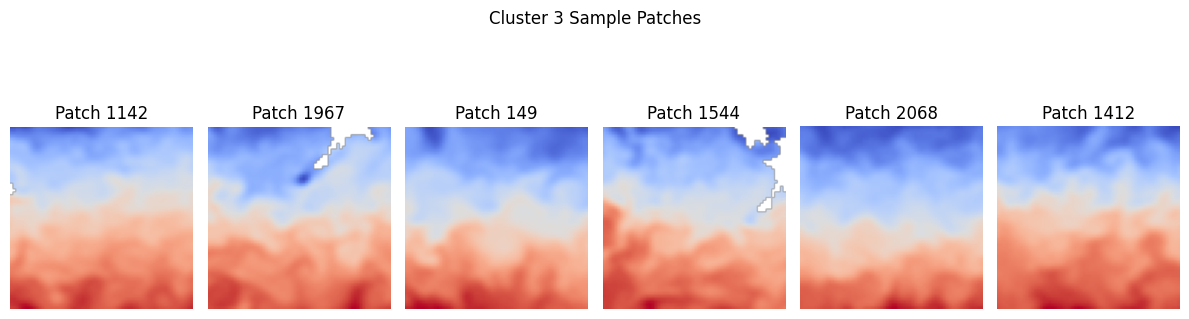

In [12]:
import random

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

for cluster_id in range(n_clusters):
    idxs = np.where(labels == cluster_id)[0]
    print(f"🌀 Cluster {cluster_id} — {len(idxs)} patches")

    sample_idxs = random.sample(list(idxs), min(6, len(idxs)))

    plt.figure(figsize=(12, 4))
    for i, idx in enumerate(sample_idxs):
        plt.subplot(1, 6, i + 1)
        plt.imshow(patches[idx], cmap="coolwarm")
        plt.title(f"Patch {idx}")
        plt.axis("off")
    plt.suptitle(f"Cluster {cluster_id} Sample Patches")
    plt.tight_layout()
    plt.savefig(
        project_root / "results" / "figures" / f"cluster_{cluster_id}_sample_patches.png",
        dpi=300,
        bbox_inches="tight"
    )
    plt.show()

### 🔍 Cluster Interpretation

Based on visual inspection of SST patches in each cluster:

- **Cluster 0** (2343 patches):  
  These patches exhibit smooth SST gradients, often transitioning from warm to cold zones.  
  They appear to represent **typical mid-latitude or equatorial patterns** with clear zonal structure, including coastal and frontal SST features.  
  This cluster likely reflects "normal" oceanographic conditions with good data coverage.

- **Cluster 1** (84 patches):  
  This cluster contains **patches with more noise, missing data, or abrupt transitions**, often dominated by cold SSTs.  
  Many of these patches seem to include **sea ice edges, high-latitude regions**, or areas near landmasses.  
  These represent **anomalous or boundary cases** compared to the dominant patterns in Cluster 0.

📌 This analysis confirms that the autoencoder has learned to encode oceanographic structure — and that clustering in latent space successfully separates **common** and **unusual** SST patterns without supervision.
